# 数据分析基础篇 - 数据预处理

<br>


## 目录 - 数据预处理

* [0. 数据预处理简介](#0.数据预处理)
* [1. 数据清洗](#1.数据清洗)
 * [1.1 缺失值处理](#1.1-缺失值处理)
   * [1.1.1 拉格朗日插值法](#1.1.1-拉格朗日插值法)
   * [1.1.2 牛顿插值法](#1.1.2-牛顿插值法)
   * [1.1.3 分段插值法 - 线性](#1.1.3-分段插值法---线性)
 * [1.2 异常值处理](#1.2-异常值处理)
* [2.数据集成](#2.-数据集成)
 * [2.1 实体识别](#2.1-实体识别)
 * [2.2 冗余属性识别](#2.2-冗余属性识别)
 * [2.3 数据变换](#2.3-数据变换)
 * [2.4 简单函数变换](#2.4-简单函数变换)
 * [2.5 规范化(归一化)](#2.5-规范化(归一化))
   * [2.5.1 最小-最大标准化](#2.5.1-最小-最大标准化)
   * [2.5.2 零-均值标准化](#2.5.2-零-均值标准化)
   * [2.5.3 小数定标标准化](#2.5.3-小数定标标准化)
* [3.数据规约](#3.-数据归约)
 * [3.1 属性规约](#3.1-属性归约)
 * [3.2 数值规约](#3.2-数值归约)
   * [3.2.1 非参数规约](#3.2.1-无参数据规约) 
   * [3.2.2 参数规约](#3.2.2-有参数据规约) 

## 0.数据预处理

在之前的章节中（数据探索），我们知道大量的数据集可能存在着大量不完整（有缺失值）、不一致、有异常的数据，这些数据会影响到数据挖掘、建模的相关执行效率，甚至可能会导致挖掘结果的偏差，所以进行相关的数据预处理工作就非常重要。

数据预处理的目的：

+ 1. 提高数据的质量，使用相关数学方法处理缺失值、异常数据；
+ 2. 让数据具有统一的格式并更好地适应特定的挖掘技术或者工具；

数据预处理的技术（流程）：

+ 1. 数据清洗： 填补缺失的值，光滑噪音数据、识别和删除离群点，解决数据的不一致性；
+ 2. 数据集成： 使用多个源数据；
+ 3. 数据归约： 使用较小的、替代的数据代替元数据，得到的信息的损失最小化；
+ 4. 数据变换： 将数据进行相关的操作，标换成需要的挖掘形式；

![1](https://ss.csdn.net/p?https://mmbiz.qpic.cn/mmbiz_png/roPWrjQ5nUG9X3FRJIibNB3zUMIRYKibEyPvotnEQUw28KXR0icr7s5lNOQoYdT3LJ2BicKdq5xEMn9txBc6jbzMwA/640?wx_fmt=png)

数据预处理工作非常重要，数据的质量将会影响到最终的建模质量；

参考链接：

+ [为什么我们需要数据预处理？](https://blog.csdn.net/csdnnews/article/details/88265321)


In [1]:
# 先导入我们需要用到的相关数据集
import pandas as pd
import sys
import matplotlib.pyplot as plt
import scipy
import numpy as np
import time
import datetime
import random
import platform

try:
    data_file = pd.read_csv("../../issue_Documents/data/test_data/loans.csv")
except FileNotFoundError:
    data_file = pd.read_csv("../issue_Documents/data/test_data/loans.csv")

data_file

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2.0,0.0,0.0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5.0,0.0,0.0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8.0,0.0,0.0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5.0,0.0,0.0,1


In [2]:
# 在前边我们已经明确了相关列名的含义
data_description = {'是否符合信用承保标准': 'credit_policy',
 '贷款的目的': 'purpose',
 '贷款的利率': 'int_rate',
 '每月付款': 'installment',
 '年收入的自然对数': 'log_annual_inc',
 '借款人的债务收入比': 'dti',
 '借款人的 FICO 信用评分': 'fico',
 '借款人拥有信用额度的天数': 'days_with_cr_line',
 '借款人的循环余额': 'revol_bal',
 '借款人的循环线利用率': 'revol_util',
 '借款人最近6个月的债权人查询次数': 'inq_last_6mths',
 '借款人在过去 2 年内逾期 30 天以上的付款次数': 'delinq_2yrs',
 '借款人的贬义公共记录数量': 'pub_rec',
 '款是否未全额偿还': 'not_fully_paid'}
data_description

{'是否符合信用承保标准': 'credit_policy',
 '贷款的目的': 'purpose',
 '贷款的利率': 'int_rate',
 '每月付款': 'installment',
 '年收入的自然对数': 'log_annual_inc',
 '借款人的债务收入比': 'dti',
 '借款人的 FICO 信用评分': 'fico',
 '借款人拥有信用额度的天数': 'days_with_cr_line',
 '借款人的循环余额': 'revol_bal',
 '借款人的循环线利用率': 'revol_util',
 '借款人最近6个月的债权人查询次数': 'inq_last_6mths',
 '借款人在过去 2 年内逾期 30 天以上的付款次数': 'delinq_2yrs',
 '借款人的贬义公共记录数量': 'pub_rec',
 '款是否未全额偿还': 'not_fully_paid'}

In [3]:
data_file.corr(method="spearman")

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.287878,0.073698,0.030228,-0.080286,0.352399,0.113409,-0.009222,-0.108413,-0.431072,-0.057907,-0.048810,-0.158119
int_rate,-0.287878,1.000000,0.242914,0.042297,0.216114,-0.744986,-0.133651,0.148719,0.472061,0.178337,0.173175,0.094207,0.152725
installment,0.073698,0.242914,1.000000,0.431826,0.062547,0.085257,0.202542,0.351844,0.094253,-0.003791,-0.007897,-0.027581,0.040404
log_annual_inc,0.030228,0.042297,0.431826,1.000000,-0.059087,0.107281,0.399775,0.416840,0.054581,0.030083,0.030209,0.013187,-0.035382
dti,-0.080286,0.216114,0.062547,-0.059087,1.000000,-0.214496,0.073319,0.375950,0.332962,0.030362,-0.018642,0.009284,0.035899
fico,0.352399,-0.744986,0.085257,0.107281,-0.214496,1.000000,0.251221,-0.094562,-0.519832,-0.176155,-0.237364,-0.148011,-0.147920
days_with_cr_line,0.113409,-0.133651,0.202542,0.399775,0.073319,0.251221,1.000000,0.325609,-0.003214,-0.042789,0.095395,0.101220,-0.024862
revol_bal,-0.009222,0.148719,0.351844,0.416840,0.375950,-0.094562,0.325609,1.000000,0.516591,-0.018197,-0.053698,-0.025586,0.020440
revol_util,-0.108413,0.472061,0.094253,0.054581,0.332962,-0.519832,-0.003214,0.516591,1.000000,-0.013029,-0.032031,0.072230,0.081395
inq_last_6mths,-0.431072,0.178337,-0.003791,0.030083,0.030362,-0.176155,-0.042789,-0.018197,-0.013029,1.000000,0.020471,0.057275,0.132034


> 可能目前对相关的库不是很熟悉，或者根本不了解，但是看永远是看不会的，带着问题去解决问题永远比去看要快很多；<br>
> Ganbare!

## 1.数据清洗

数据清洗的主要目的就是处理原有数据集中影响建模的相关数据，其缺失值的主要分类有：

+ 无关数据
+ 重复数据
+ 平滑的噪声数据
+ 筛选与主题无关的数据
+ 处理缺失值
+ 异常值

<br>

### 1.1 缺失值处理

缺失值指的是在数据集中出现没有数据的一行或者一列，常用的处理方法：

+ 删除记录：将出现缺失值的一列或者一行删除掉；
+ 数据插补：均值、中位数、众数、固定值、近邻值插补、回归模型得出的值、近似插值法进行插补；
+ 不处理

删除记录的方法存在的问题： 在数据集本来就很小的情况下，删除缺失值可能会造成相关数据资源的浪费，会丢失相应隐藏的相关信息，从而影响最终结果的客观性；

在这里主要介绍： **拉格朗日插值法**、**牛顿插值法**、**分段插值法**、**样条插值法**

<br>

#### 1.1.1 拉格朗日插值法

在线性代数中（数学基础），任意一个坐标点都可以找到一个线性相关公式：$y=a_0+a_1+a_2+a_3+\cdots+a_{n-1}x^{n-1}$ 来表示某个点的线性特征；

如果有 $n$ 个点，那么将这 $n$个坐标 $(x_1,y_1)(x_2,y_2)\cdots(x_i,y_i)$带入多项式函数：


<br>
$$
\begin{equation}
\left\{
    \begin{array}{**lr**}
    y_1 = a_0+a_1x_1+a_2x_1^2+\cdots+a_{n-1}x_1^{n-1} & \\
    y_2 = a_0+a_1x_1+a_2x_2^2+\cdots+a_{n-1}x_2^{n-1} & \\
    \vdots \\
    y_n = a_0+a_1x_1+a_2x_2^2+\cdots+a_{n-1}x_2^{n-1} & \\
    \end{array}
\right.
\end{equation}
$$
<br>


即在这个场景下：我们需要明白一点，就是所有数据集中的数值都可以通过上边的公式进行表示；

现在问题就是：在 Pandas 中，缺失的值极个别地出现在某些行中，设缺失的值为：$y_i$，缺失的列为: $col_i$，需要参考没有缺失的其他行的其他列($\lnot{a}$)：$x_1,x_2,\cdots,x_{i-1}$ 以及 $y_i({a})$;


我们假设存在这样的多项式 $f(x)$，满足下边的要求：

$$
\begin{equation}
f(x) = y_1f_1(x_1) + y_2f_2(x_2) + y_3f_3(x_3) + \cdots + y_{i}f(x_{i})
\end{equation}
$$

<br>
这个公式需要满足下边的条件，我们以 $i=3$ 来进行举例：

$$
f(x_1) = y_1f_1(x_1)
f(x_2) = y_2f_2(x_2)
f(x_3) = y_3f_3(x_3)
$$
<br>

即在 $y_1f_1(x_1)=y_1$ 时，同时满足 $f_2(x_2)=0$ $f_3(x_3)=0$
其他参数构建的插值基函数与这个特征类同；

即我们需要构造这样的插值基函数，满足在 $x_{i}$ 条件下：

$$
f(x) = y_{j}f_{j}(x_j) = y_{j}
$$

<br>

$$
\sum_{i \neq j}^i{f_j(x_j) = 0}
$$

在数学中我们都知道，$1\cdot x = x$ 和 $0 \cdot x = 0$，因此构造的公式也类似；

在多值插项式中，可以构建如下的公式，满足：

$$
\begin{equation}
f_j(x_j)
\left\{
    \begin{array}{**lr**}
    1 & i=j     \\
    0 & i\neq j   \\
    \end{array}
\right.
\end{equation}
$$

以 $i\in (1,2,3)$ 举例，定义插值基函数 $f_1(x)$：

$$
f_1(x) = y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}
$$

我们将上边的公式进行验证：

当 $x_{i=1}$ 时：

$$
f_1(x_1) = y_1 \frac{(x_1-x_2)(x_1-x_3)}{(x_1-x_2)(x_1-x_3)} = 1
$$

当 $x_{i=2}$ 时：

$$
f_1(x_2) = y_2 \frac{(x_2-x_2)(x_2-x_3)}{(x_1-x_2)(x_1-x_3)} = 0
$$

当 $x_{i=3}$ 时，同上， $f_1(x_3) = 0$：


即从上边的例子，可以推导出：

$$
y_i = y_1\frac{(x_i-x_2)(x_i-x_3)}{(x_1-x_2)(x_1-x_3)} + y_2\frac{(x_i-x1)(x_i-x_3)}{(x_2-x_1)(x_2-x_3)} + y_3\frac{(x_i-x_1)(x_i-x_2)}{(x_3-x_1)(x_3-x_2)}
$$

可能会有点疑惑，上边的公式的适用的场景是：知道了三个点 $(x_1,y_1)$ $(x_2,{y_2})$ $(x_3,y_3)$，求在第四个点的坐标：$(x_4,y_4)$ 的 $y$ 值；

得到通用公式：

$$
y = \sum_{i=0}^n{y_i(\prod_{j=0,j \neq i}^n\frac{x-x_j}{x_i-x_j})}
$$

<br>

请参考 `scipy.lagerange` 函数来生成对应的多项式：[scipy.interpolate.lagrange](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)


<br>

数据分析应用场景 - Pandas：

+ 在 $col_1, col_2, \cdots , col_n$ 中可能会存在空值行，设 $ col_n=x_n $；
+ 1. 选取一列 `DataFrame`，记为 `Series (se)` ；
+ 2. 取一个数：`k`，这个数代表取空值行前后行的行数，用来做拉格朗日的插值分析数字；
+ 3. 我们构成这样的数据结构：$$ (x,y) \\ \updownarrow \\ (x:代表行数{index},\; y:代表选取的列在行{index}值{se[index]}) $$ <br>
+ 4. 因此构建的拉格朗日的相关点的坐标数据是，以 $ i=5 为空行 $  $ k=3 $ 进行举例：
    + $(2,se[2])\;(3,se[3])\;(4,se[4])\;(6,se[6])\;(7,se[7])\;(8,se[8])$ : 其中数字$n$都是行号，$se[n]$是对应的选取列和行的值；
    + $(5,y)$ 是我们需要求的目标数据值，即以上边的几个点数据构建的拉格朗日多项式来求出空值：$y$


参考链接：

+ [如何直观地理解拉格朗日插值法？](https://www.zhihu.com/question/58333118)
+ [拉格朗日插值法(图文详解)](https://www.cnblogs.com/ECJTUACM-873284962/p/6833391.html)

In [4]:
# 现在我们来演示一下拉格朗日插值法在实际中的应用，因为这个方法比较繁琐不是很常用，但是是非常关键的一个概念；
# 延伸概念：范德蒙矩阵 / 牛顿插值法
# 先打印空值行
data_file.isnull().sum()

credit_policy         0
purpose               0
int_rate              0
installment           0
log_annual_inc        4
dti                   0
fico                  0
days_with_cr_line    29
revol_bal             0
revol_util           62
inq_last_6mths       29
delinq_2yrs          29
pub_rec              29
not_fully_paid        0
dtype: int64

In [5]:
# 我们选取值比较接近的数据列进行比较 - log_annual_inc
data_file["log_annual_inc"]

0       11.350407
1       11.082143
2       10.373491
3       11.350407
4       11.299732
          ...    
9573    12.180755
9574    11.141862
9575    10.596635
9576    10.819778
9577    11.264464
Name: log_annual_inc, Length: 9578, dtype: float64

In [6]:
# 打印一下相关的数据特征
# 在这里我们先复制一下新的对象到内存中，具体请参考： pandas.DataFrame.copy 函数
data_file_copy = data_file.copy()
log_se = data_file_copy["log_annual_inc"]
log_se[log_se.isnull()]

7726   NaN
7741   NaN
7742   NaN
7743   NaN
Name: log_annual_inc, dtype: float64

In [7]:
# 打印这个区间的最大值
log_se[7700:7800].max()

13.12236338

In [8]:
# 打印区间
log_se[7700:7800].min()

8.29404964

In [9]:
# 打印缺失值的区间
null_valueIndex = log_se[log_se.isnull()].index.to_list()
null_valueIndex

[7726, 7741, 7742, 7743]

In [10]:
from scipy.interpolate import lagrange

data_file_copy = data_file.copy()
log_se = data_file_copy["log_annual_inc"]

# 现在我们构建对应的函数 - pd_lagrange() 来撰写
# 获取对应的空值 - list
null_valueIndex = log_se[log_se.isnull()].index.to_list()

# 构建新的函数 pd_lagrange
def pd_lagrange(se: pd.Series, null_valueIndex: list, k=2):
    # se: Pandas.Series 数据结构
    # null_valueIndex: List 存放空值行数
    # k: 选取前后行的数字
    
    # 遍历所有的空值行
    for index in null_valueIndex:
        # 选取上下K的数据
        y_se = se[list(range(index-k,index)) + list(range(index+1, index+k+1))]
        # 将空值的行去掉
        y_se = y_se[y_se.notnull()]
        # 将上边所有的值输入到拉格朗日多项式中，并且生成一个新的多项式；
        # 并使用 pd.loc 函数来重新赋值空值行
        se.loc[index] = scipy.interpolate.lagrange(list(y_se.index), list(y_se))(index)

# 运行 pd_lagrange 函数来填补相关的缺陷值
pd_lagrange(log_se, null_valueIndex, k=2)

# 打印出原来空值的相关行
log_se[null_valueIndex]

/Users/doheras/opt/anaconda3/envs/auto_Demo/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


7726    11.480101
7741    11.022719
7742    11.299090
7743    11.226997
Name: log_annual_inc, dtype: float64

---

**练习**
$\textsf{TODO - 1.1:}$

请使用 `log_annual_inc` 列数据进行下边的练习；

+ 1. 在上边我们知道了如何使用拉格朗日插值法来处理缺失的值，在我们定义的拉格朗日插值模型时，定义了一个 $k$ 值来选取空值行周围的没有空值的近邻行，请尝试更改 $k$ 值并打印出相关的缺失值填充结果，并说出在不同`k`值时你的发现；
+ 2. 在上边的函数： `pd_lagrange` 函数中确定了我们的构建代码，但是在这个代码中存在相关的问题，将下边这两个：
    + 2.1 - 通过观察，我们发现$x$ 的值过大( $7700<x<7800$ )，而 $y$ 的取值范围( $8.29404964 \leq y \leq 13.12236338$ )，存在数据不平衡的问题，请尝试减小 $x$ 的值来重新构建函数；
    + 2.2 - 通过观察我们发现，缺失值区间中有的缺失值是呈现连续的，比如(7741, 7742, 7743)，这样我们在取非缺失点时就会出现问题，请尝试使用其他方法来改变这个问题；
    + 2.3 - 在更改之后，请思考 `k` 的取值对于在不同`x`取值时的大小特点，即是否可以更改`k`值来提升拉格朗日多项式插值法对于缺失值的预测情况；
+ 参考思路：
    + 对于 $x$ 的值过大，我们可以尝试减去一个值,构建一个标准的坐标式，再放入到 lagrange 函数中构建拉格朗日多项式；
    + 连续的问题，我们可以使用： `pandas.DataFrmae.sample.reset_index` 函数来打乱数据；

---

In [11]:
# 解决 1.1 的第一个问题，我们只需要在后边构建一个迭代器就OK了


进行 k 值遍历:
k 的取值是：1
7726    11.425749
7741    10.463103
7742    10.463103
7743    10.732602
Name: log_annual_inc, dtype: float64


k 的取值是：2
7726    11.480101
7741    11.022719
7742    11.299090
7743    11.226997
Name: log_annual_inc, dtype: float64


k 的取值是：3
7726   -7824.000000
7741      11.564598
7742      11.843750
7743   -3456.000000
Name: log_annual_inc, dtype: float64


k 的取值是：4
7726    9.294578e+10
7741    8.960000e+02
7742    2.281701e+09
7743   -1.614090e+19
Name: log_annual_inc, dtype: float64


k 的取值是：5
7726    2.852749e+18
7741    2.630667e+10
7742   -2.786196e+23
7743   -1.395158e+40
Name: log_annual_inc, dtype: float64




In [12]:
# 我们先尝试打乱一下 DataFrame， 使用 pandas.DataFrame.sample.reset_index
# 考虑打乱相关的数据集
data_file_copy = data_file.copy()
data_file_copy = data_file_copy.sample(frac=1.0).reset_index(drop=True)
# 再尝试打印一下相关的信息 - log_annual_inc
log_se = data_file_copy["log_annual_inc"]
print("乱序之前的序号：")
print(list(data_file[data_file["log_annual_inc"].isnull()]["log_annual_inc"].index))
print("\n")
print("乱序之后的序号：")
print(list(log_se[log_se.isnull()].index))
# 通过上边的 null_valueIndex 进行比对

乱序之前的序号：
[7726, 7741, 7742, 7743]


乱序之后的序号：
[562, 3275, 6619, 8744]


In [13]:
# 在 Panda 你可以指定 seed(random_state) 来保证每次的打乱的结果是相同的
data_file_copy = data_file.copy()
data_file_copy = data_file_copy.sample(frac=1.0, random_state = 23).reset_index(drop=True)
# 再尝试打印一下相关的信息 - log_annual_inc
log_se = data_file_copy["log_annual_inc"]
print("乱序之前的序号：")
print(list(data_file[data_file["log_annual_inc"].isnull()]["log_annual_inc"].index))
print("\n")
print("乱序之后的序号：")
print(list(log_se[log_se.isnull()].index))
# 在这里不管你运行多少次，乱序之后的序号都是相同的，因此可以有效地来进行数据结果的操控；
# 可以在后边的练习 1.1 中使用这个特性，来验证你的想法

乱序之前的序号：
[7726, 7741, 7742, 7743]


乱序之后的序号：
[2175, 2715, 4135, 4877]


In [14]:
# 2.1 2.2 2.3 解决代码


进行 x 的相关规约化函数的结果（打乱原先的数据集并将X的值进行集中）: 

------
对 x 进行相关规约集中之前的序号是：[200 3705 4585 7418]
选取的行：200
对 x 进行相关规约集中之后的序号是：[0 2]
选取的行：3705
对 x 进行相关规约集中之后的序号是：[0 2]
选取的行：4585
对 x 进行相关规约集中之后的序号是：[0 2]
选取的行：7418
对 x 进行相关规约集中之后的序号是：[0 2]
k 的取值是：1
200     10.487557
3705    10.755812
4585    10.612081
7418    10.893988
Name: log_annual_inc, dtype: float64
------


------
对 x 进行相关规约集中之前的序号是：[1071 2188 2521 5884]
选取的行：1071
对 x 进行相关规约集中之后的序号是：[0 1 3 4]
选取的行：2188
对 x 进行相关规约集中之后的序号是：[0 1 3 4]
选取的行：2521
对 x 进行相关规约集中之后的序号是：[0 1 3 4]
选取的行：5884
对 x 进行相关规约集中之后的序号是：[0 1 3 4]
k 的取值是：2
1071    10.666122
2188    10.411392
2521    10.210633
5884    11.157987
Name: log_annual_inc, dtype: float64
------


------
对 x 进行相关规约集中之前的序号是：[2411 4867 5321 8128]
选取的行：2411
对 x 进行相关规约集中之后的序号是：[0 1 2 4 5 6]
选取的行：4867
对 x 进行相关规约集中之后的序号是：[0 1 2 4 5 6]
选取的行：5321
对 x 进行相关规约集中之后的序号是：[0 1 2 4 5 6]
选取的行：8128
对 x 进行相关规约集中之后的序号是：[0 1 2 4 5 6]
k 的取值是：3
2411     9.751268
4867    11.578815
5321    11.629000
8128    10.591625
Name: log_annual

#### 1.1.2 牛顿插值法

牛顿插值法简单来说，就是对于多个点的阶差上定义，在了解这个概念之前我们必须了解什么是差商的概念；

从上边的拉格朗日插值法我们知道，对于多个点都是可以得到经过点的对应函数的，我们设为$f(x)$；

设我们需要插值的点为： $(x_i,y_i) \; \; \; \; \; \; (i=0,1,2,\cdots,n)$

以两个点进行举例，设两个点：$(x_1,f(x_1))$ 和 $(x_2,f(x_2))$；

需要构造一个阶差函数 $f_1(x)$ 来保证： 

$$
f_1(x_1) = f(x_1) \quad \quad (x = x_1)
$$

<br>

通过上边拉格朗日插值法，我们都知道如何去构建这样的插值多项式，即：

$$
\begin{equation}
f_1(x) = f(x) + b_1(x-x_1)
\end{equation}
$$

<br>

我们求一下上边等式的 $b_1$ 的值，令 $f_1(x_2) = f(x_2)$：

$$
\begin{equation}
    \begin{aligned}
        f_1(x) \; & = \quad f(x) + b_1(x-x_1) \\ \\
        & \Rightarrow \quad b_1 = \frac{f(x_2)-f(x_1)}{x_2-x_1} \\ \\
        & \Rightarrow \quad f_1(x) = f(x_1) + \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1)
    \end{aligned}
\end{equation}
$$


如果有三个点呢？

设存在一个函数 $f_2(x)$ 满足三个点：$(x_1,f(x_1))$ $(x_2,f(x_2))$  $(x_3,f(x_3))$ :

<br>

$$
\begin{equation}
f_2(x) \; = \quad f_1(x) + b_2(x-x_1)(x-x_2) \\
\end{equation}
$$


令 $f_2(x_3) = f(x_3)$:

$$
\begin{equation}
    \begin{aligned}
        f_2(x) \; & = \quad f_1(x) + b_2(x-x_1)(x-x_2) \\ \\
        & \Rightarrow \quad b_2 = \frac{[\frac{f(x_3)-f(x_2)}{x_3-x_2}]-[\frac{f(x_2)-f(x_1)}{x_2-x_1}]}{x_3-x_1} \\
        & \Rightarrow \quad f_2(x) = f(x_1) + \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1) + \frac{[\frac{f(x_3)-f(x_2)}{x_3-x_2}]-[\frac{f(x_2)-f(x_1)}{x_2-x_1}]}{x_3-x_1}(x-x_1)(x-x_2)
    \end{aligned}
\end{equation}
$$

<br>

从上边得到对应的多项式插值公式,可以看到有一定的对应规律，我们记一阶差商为：$f[xi,xj](x \neq j)$，记二阶差商为： $f[x_i,x_j,x_k](i \neq j \neq k)$  ....

<br>

$$
\begin{equation}
    \begin{aligned}
        f[x_i,x_j] & = \frac{f(x_j)-f(x_i)}{x_j-x_i},\quad (i \neq j) \\
        f[x_i,x_j,x_k] & = \frac{f[i,j]-f[j,k]}{x_i-x_k},\quad (i \neq j \neq k) \\
        f[x_0,x_1,x_2,\cdots,x_n] & = \frac{f[x_1,x_2,\cdots,x_k]-f[x_0,x_1,\cdots,x_{n-1}]}{x_n-x_0}
    \end{aligned}
\end{equation}
$$

<br>

说明：

+ 在上边的公式中，$b_n$ 被重新记为 $f[x_1,x_2,\dots,x_n]$，即为不同的差商；

<br>

综上，牛顿插值法的定义：

知道了 $n$ 个点，可以构建牛顿插值多项式：

$$
\begin{equation}
N_n(x) = f[x_0]w_0(x) + f[x_0,x_1]w_1(x) + \cdots + f[x_0,x_1,\cdots,x_n]w_n(x)
\end{equation}
$$

<br>

其中，$ w_0(x) = 1 $ &emsp; $w_n(x) = (x-x_0)(x-x_1)\cdots(x-x_n)$

在区间 $[a,b]$ 中的任意一点有：

$$
f(x) = N_n(x)+R_n(x)
$$


<br>

牛顿插值法在 Pandas 中的应用：

+ 类似于拉格朗日插值法，我们需要选定特定的列，即将数据类型从 Pandas.DataFrame 转为 Pandas.Series 类型；
+ 选中空值周围的 $k$ 个数，选中的数据结构为：`(index, value)`
+ 即选中的数据：$$ (x,y) \\ \updownarrow \\ (x:代表行数{index},\; y:代表选取的列在行{index}的值) $$ <br>
+ 构建牛顿的插值法的函数；
+ 将缺失值的 `index` 带入到多项式中求值；


牛顿插值法的展 - 泰勒公式；


参考链接：

+ [Lagrange、Newton、分段插值法及Python实现](https://cloud.tencent.com/developer/article/1423591)
+ [拉格朗日插值和牛顿插值（Python）](https://zhuanlan.zhihu.com/p/154460878)
+ [牛顿插值的几何解释是怎么样的？ - 马同学的回答 - 知乎](https://www.zhihu.com/question/22320408/answer/141973314)


#### 1.1.3 分段插值法 - 线性

插值是在直线或曲线上的两点之间找到值的一种处理过程。 为了更好地理解插值的意义，这里我们这样说：即依据一系列点 (x,y)通过一定的算法找到一个合适的函数来逼近这些点，反映出这些点的走势规律。当拟合出插值函数后便可用这个插值函数计算其他 x 对应的的 y值，这就是插值的意义所在。

分段插值法分为：线性插值法 (一阶)、二阶插值法(二次多项式);

**线性插值法 (一阶)**

对于线性分段插值法，在区间 $[a,b]$ 之间的所有数值按照从小到大的顺序进行排列，在两个数值点之间构成一个线性多项式，用整个区间的线性多项式来逼近构建的函数 $f(x)$

**二阶插值法**

选取插入点最近的三个点，来构建一个二次多项式；

在 Scipy 中，提供了 `scipy.interpolate.interp1d` 来进行线性插值；

我们使用上边的： `log_annual_inc` 的数据进行插值的计算；

参考链接：

+ [Python：插值interpolate模块](https://zhuanlan.zhihu.com/p/136700122)

In [15]:
from scipy.interpolate import interp1d

# 选取 - 列 log_annual_inc  使用深拷贝函数
log_se = data_file["log_annual_inc"].copy()

# shuffle 
log_se = log_se.sample(frac=1.0).reset_index(drop=True)

# 找出空值的相关
print("打印出空值的行数")
print(log_se[log_se.isnull()])
print("\n")

# 构建函数 - 分段线性插值法
def line_inter(se: pd.Series, null_valueIndex:list, k=3):
    for sid in null_valueIndex:
        # 选取相关的 index 数字列表
        index_list = list(range(sid-k,k)) + list(range(k+1,k+sid))
        y = se[index_list]
        y = y[y.notnull()]
        se[sid] = interp1d(list(y.index), list(y), kind="linear")(sid)

# 生成一个空值 Index 列表
null_valueIndex = log_se[log_se.isnull()].index.tolist()

# 放入上边的函数
line_inter(log_se, null_valueIndex)
# 打印
log_se[null_valueIndex]

打印出空值的行数
3770   NaN
6663   NaN
7583   NaN
7678   NaN
Name: log_annual_inc, dtype: float64




3770    10.543954
6663    10.958594
7583    10.989441
7678    10.789844
Name: log_annual_inc, dtype: float64

---

**练习**
$\textsf{TODO - 1.2:}$

请使用 `log_annual_inc` 列数据进行下边的练习；

+ 1. 在上边我们完成了分段差值 - 线性的相关函数的构建，现在请查阅 interpolate. interp1d API:  [scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)  完成构建一个 "二次" 插值多项式 - "quadratic" 的函数，请参考上边的代码撰写你的代码：

---

In [16]:
# 练习 1.2 完成区域


打印出空值的行数
3471   NaN
4193   NaN
6933   NaN
8887   NaN
Name: log_annual_inc, dtype: float64


二次插值多项式结果：


3471    10.226107
4193    11.249708
6933     9.969369
8887    10.506340
Name: log_annual_inc, dtype: float64

#### 1.1.4 样条插值法

在一组离散的数据基础上插补连续函数，类似于 拉格朗日插值多项式、牛顿插值多项式、分段差值法，都是在样本区间(离散数值区间)中找到一个函数将所有的样本点都在函数的曲线上； - 这也是插值的基本定义；

**样条插值法**： 在两点之间确定一个函数，这个函数就是一个**样条**，所有的离散点之间都要生成一个样条，最后将所有的样条分段结合成一个函数；

一般来说，样条插值的相关代表是：3次样条插值法 ；

与常规的分段差值法的代表就是多项式的阶数；

参考链接：

+ [矩阵与数值计算（13）——分段低次插值与三次样条插值](https://zhuanlan.zhihu.com/p/331487422)
+ [数值分析(6)：分段低次插值和三次样条插值](https://zhuanlan.zhihu.com/p/368911657)

### 1.2 异常值处理

异常处理用来解决在数据集当中的异常值处理问题，异常值的判别方法有：$3\sigma$原则，四分位数法等；

**常见的异常值处理法**如下：

|      异常值处理方法      |                           方法描述                           |
| :----------------------: | :----------------------------------------------------------: |
| 删除包含异常值的相关记录 |                将存在异常值的相关数据进行删除                |
|    将异常值视为缺失值    | 使用缺失值的相关处理办法：拉格朗日插值法、样条插值法、牛顿插值法等进行处理 |
|        平均值修正        |        使用异常值前后的值进行平均值，补充异常值的缺失        |
|          不处理          | 在某些数据模型当中缺失值以及异常值不会造成相关的影响，因此不需要进行处理 |



## 2. 数据集成

在数据挖掘分析当中，大多数数据集往往被分布在不同的数据源当中，数据集成就是将多个数据合并到一个数据结构当中；

因为数据表现的形式是不同的，因此在集成数据的时候需要考虑到下边两个点：

+ 1.实体的识别问题
+ 2.属性的冗余问题

<br>

### 2.1 实体识别

实体，在数据分析处理中，也可以被理解成为对象的概念，即数据分析的具体作用对象；

常见的实体识别如下：

1.同名异义

不同数据源中的”同名“情况的处理，即在一些数据集中相同名称可能也会代表的是不同的含义；

2.异名同义

不同的数据源当中”异名“情况代表的是相同的含义；

3.单位不统一

在数据当中可能存在数据单位不一致的情况，针对单位不一致的情况需要统一相关的单位；

<br>

### 2.2 冗余属性识别

数据集成往往会导致数据冗余，数据冗余的相关概念：

+ 在数据集当中，同一个属性可能会出现多次，出现多次的原因可能是： 命名不一致导致重复、单位不一致导致重复

在数据分析和预处理当中，需要对冗余的属性进行处理，从而提升建模的准确性；

<br>

### 2.3 数据变换

数据变换指的是对数据进行规范化的处理，将数据转换成适当的相关形式；

<br>

### 2.4 简单函数变换

函数的相关变化包括以下的几种：

+ 平方
+ 开方
+ 取对数
+ 差分运算

在数据分析和预处理阶段中，可以通过相关的数据变化将本来不具备正态分布的相关数据变得符合正态分布，从而更好地去适应相关的数据模型需要；

在时序分析当中，对数据进行简单的对数变换和查分运算可以将非平稳序列转换成伟平稳序列；

<br>

### 2.5 规范化(归一化)

数据标准化（归一化）是建立数据模最重要的一项工作，在前边的相关工作当中，我们就已经知道了归一化可能对数据产生的影响；

归一化解决的相关问题： 消除数据中量纲和取值范围差异的相关影响；

方法：

+ 对数据按比例进行缩放，进入到一个相对集中的区域中，以便进行综合分析；

数据的规范化对基于相关距离的挖掘算法非常重要；

常用的相关操作如下：

+ 最小 - 最大规范化
+ 零 - 均值规范化
+ 小数定标规范化

#### 2.5.1 最小-最大标准化

最小-最大规范化也成为离差标准化，是对原始数据的线性变化，经过计算可以将所有的数值的取值区域都集中在： $[0,1]$  之间；

转化的相关公式如下：

$$
x^* = \frac{x-min}{max-min} \\
\\
\\
max: 样本的最大值 \;\;\; min: 样本的最小值
$$

问题：

+ 如果数据集当中所有的数据都非常接近并且某个数出现机制的情况，那么最小-最大标准化的值都比较接近0；

<br>

作用:

将某个特征的值映射到[0,1]之间，消除量纲对最终结果的影响，使不同的特征具有可比性，使得原本可能分布相差较大的特征对模型有相同权重的影响，提升模型的收敛速度，深度学习中数据归一化可以防止模型梯度爆炸；

<br>

#### 2.5.2 零-均值标准化

零-均值标准化： 也被称为”标准差标准化“，经过”零-均值标准化“处理之后的相关数据均值为0，标准差为1；

公式为：

$$
x^* = \frac{x - \overline x}{\sigma}\\
\\
\\
\overline x: 数据集中的平均值 \;\;\; \sigma： 数据集中的标准差
$$

是使用最多的数据标准化方法；

<br>

#### 2.5.3 小数定标标准化

通过移动相关移动属性值的小数位数，将属性值映射到：$[-1,1]$ 之间，移动的小数位数取决于属性值绝对值的最大值；

$$
x^* = \frac{x}{10^k}\\
\\
\\
k \; 值取决于实际数据的大小
$$

<br>

标准化的作用：

+ 在回归的数据模型当中，归一化可以加快数学模型的收敛速度；
+ 提升模型的精度；

<br>

参考链接：

+ [归一化、标准化、零均值化作用及区别](https://zhuanlan.zhihu.com/p/183591302)
+ [中心化（又叫零均值化）和标准化（又叫归一化）](https://blog.csdn.net/GoodShot/article/details/80373372)

In [17]:
# 在这里我们使用 log_annual 来简单做一下常理的数值分析
# 尝试打印一下相关的数据参数来反映相关的数据特征
log_se = data_file["log_annual_inc"].copy()
log_se.describe()

count    9574.000000
mean       10.931874
std         0.614736
min         7.547502
25%        10.558414
50%        10.927987
75%        11.289832
max        14.528354
Name: log_annual_inc, dtype: float64

In [18]:
# 尝试使用 最小-最大标准化
# 打印一下相关数值的分布区间
log_seMaxMin = (log_se - log_se.min()) / (log_se.max() - log_se.min())
bin_log = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
pd.value_counts(pd.cut(log_seMaxMin, bin_log), sort=False)
# 可以看出来 我们现在的数据大致可以满足正态分布的需要了

(0.0, 0.1]       4
(0.1, 0.2]      28
(0.2, 0.3]     179
(0.3, 0.4]    1220
(0.4, 0.5]    4122
(0.5, 0.6]    3236
(0.6, 0.7]     681
(0.7, 0.8]      79
(0.8, 0.9]      20
(0.9, 1.0]       4
Name: log_annual_inc, dtype: int64

In [19]:
# 尝试使用 零 - 均值标准化
log_seMeanStd = (log_se - log_se.mean()) / log_se.std()
bin_log = [-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
pd.value_counts(pd.cut(log_seMeanStd, bin_log), sort=False)
# 可以看到数值的分布如下

(-0.9, -0.8]    201
(-0.8, -0.7]    359
(-0.7, -0.6]    252
(-0.6, -0.5]    437
(-0.5, -0.4]    286
(-0.4, -0.3]    421
(-0.3, -0.2]    302
(-0.2, -0.1]    562
(-0.1, 0.0]     381
(0.0, 0.1]      294
(0.1, 0.2]      576
(0.2, 0.3]      375
(0.3, 0.4]      369
(0.4, 0.5]      456
(0.5, 0.6]      335
(0.6, 0.7]      313
(0.7, 0.8]      282
(0.8, 0.9]      220
(0.9, 1.0]      269
Name: log_annual_inc, dtype: int64

In [20]:
# 小数定标标准化
log_decimalNor = log_se / 10 ** np.ceil(np.log10(log_se.abs().max()))
bin_log = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
pd.value_counts(pd.cut(log_decimalNor, bin_log), sort=False)

(0.0, 0.1]     573
(0.1, 0.2]    9001
(0.2, 0.3]       0
(0.3, 0.4]       0
(0.4, 0.5]       0
(0.5, 0.6]       0
(0.6, 0.7]       0
(0.7, 0.8]       0
(0.8, 0.9]       0
(0.9, 1.0]       0
Name: log_annual_inc, dtype: int64

### 2.6 连续属性的离散化

连续属性的离散化： 将一组连续的值根据一定的规则分别放到其术语集合中，例如常见的算法：ID3算法、Apriori算法都是分类属性形式，将连续属性变换成分类属性；

<br>

**离散化数据的好处**：

1. 离散特征的增加和减少都很容易，易于模型的快速迭代；

2. 稀疏向量内积乘法运算速度快，计算结果方便存储，容易扩展；

3. 离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰；

4. 逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合；

5. 离散化后可以进行特征交叉，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力；

6. 特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问；

7. 特征离散化以后，起到了简化了逻辑回归模型的作用，降低了模型过拟合的风险。


<br>

**过程**：

+ 在数据的取值范围之内设定若干个离散的区间，将取值的范围划分为一些离散化的区间，使用不同的符号和代表落在每个自取件中的数据值；
+ 因此离散化数据需要解决两个问题：
    + 确定分类数 / 确定分类区间
    + 将属性值映射到这些区间之中
    
<br>

**方法**：

1.等宽法

将属性的值域分成具有相同宽度的区间，每一个区间的个数由数据本身的特征决定，或者分析者指定；


2.等频法

将相同数量的记录放在同一个区间；


3.基于聚类的分析方法

使用一维的聚类方法，使用 K-means 算法将所有连续的属性进行聚类，将聚类得到的蔟进行处理，并合并到一个蔟的连续属性值做同一标记。

如果你不是很了解 K-means 算法，请单击下边的链接了解；


<br>

参考链接：

+ [连续属性离散化](https://blog.csdn.net/Eaton18/article/details/52143616)
+ [连续特征离散化的好处](https://blog.csdn.net/jbfsdzpp/article/details/47322949)
+ [K-Means聚类算法原理](https://www.cnblogs.com/pinard/p/6164214.html)

In [21]:
# 以上边的 log_annual 进行离散化的分析
log_se = data_file["log_annual_inc"]
# 使用 pd.cut 函数来做等宽的离散化
log_seWidthCut = pd.cut(log_se, bins=4, labels=range(4))
# 打印一下相关的数据信息，可以看到
log_seWidthCut

0       2
1       2
2       1
3       2
4       2
       ..
9573    2
9574    2
9575    1
9576    1
9577    2
Name: log_annual_inc, Length: 9578, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [22]:
# 使用等频法来进行相关的切割
# 需要保证的是： 所有的分组区间的间距是等距的
# 因此需要使用到等频率离散化的相关特征
area_range = [1.0*i/4 for i in range(5)]
log_se.describe(percentiles=area_range)[4:9]

0%       7.547502
25%     10.558414
50%     10.927987
75%     11.289832
100%    14.528354
Name: log_annual_inc, dtype: float64

In [23]:
# 检查当前环境的模块内容
if platform.system()=="windows":
    !pip install scikit-learn
else:
    !conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: done

# All requested packages already installed.



In [24]:
# 接下来使用 Sklearn 来训练 K-means 的模型
# 查询 KMeans API 链接： https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=4)
# 使用数据集开始训练
kmodel.fit(np.array(log_se[log_se.notnull()]).reshape((len(log_se[log_se.notnull()]),1)))

KMeans(n_clusters=4)

In [25]:
# 上边训练了 K-means 聚类模型，现在需要可视化数据模型
# 首先获得四个中心点
cluster_center = kmodel.cluster_centers_
# 我们创建一个新的 DataFrame 来
center_df = pd.DataFrame(cluster_center, columns=["center_value"]).sort_values(by="center_value")
center_df

,center_value
3,9.854571
0,10.598990
1,11.186815
2,11.923407


In [26]:
# 尝试打印一下相关的信息，上边的信息我们可以看到，我们选取了 4 个聚类中心点
# 现在需要对相关的数据进行可视化
# rolling 函数提供了相邻两个点的平均值
# 我们需要构建一个离散区间，在下边的代码构建了一个新的变量： w
w = center_df.rolling(window = 2).mean()
print(w)
w = w.dropna()
w = [0] + list(w["center_value"]) + [log_se.max()]
print("\n")
print(w)
print('\n')
d_cluster = pd.cut(log_se, w, labels=range(4))
d_cluster

   center_value
3           NaN
0     10.226780
1     10.892903
2     11.555111


[0, 10.22678042705136, 10.892902614628186, 11.555110959709545, 14.52835448]




0       2
1       2
2       1
3       2
4       2
       ..
9573    3
9574    2
9575    1
9576    1
9577    2
Name: log_annual_inc, Length: 9578, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

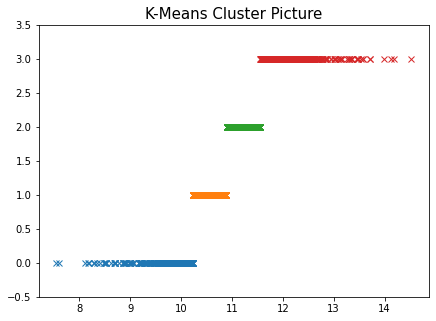

In [27]:
# 我们现在已经有了相关的数据，可以打印出相关的数据图像
plt.figure(figsize=(7,5))
plt.title("K-Means Cluster Picture", fontsize=15)
plt.ylim(-0.5,4-0.5)
for sid in range(0,4):
    plt.plot(log_se[d_cluster==sid], [sid for i in d_cluster[d_cluster==sid]], 'x')
plt.show()

## 3. 数据归约

在大数据集中进行复杂的数据分析和挖掘都需要较长的时间，因此将数据归约或者最小化可以保持元数据的完整性；

归约的意义在于：

+ 降低无效、错误数据对于建模的影响，提高建模的准确性；
+ 少量且具有代表性的数据可以大量减少数据挖掘的时间；
+ 降低数据的存储成本

<br>

### 3.1 属性归约

属性归约指的是将所有不必要的相关属性进行合并从而产生一个新属性维数，或者直接通过删除相关的属性（维度）来减少数据的复杂性，从而提升相关的数据挖掘效率，从而降低计算成本。

属性归约的目标是： 尽量的寻找较小的属性子集并确保数据子集的概率分布尽可能接近原来数据集额概率分布；

相关的常用属性归约方法：

![属性归约常用方法](http://www.tjxzj.net/wp-content/uploads/2021/02/2021022007245775.jpg)

在数据挖掘和机器学习领域中，最重要的数据预处理（归约）方法是：主成成分分析法(PCA)，其在建模的数据预处理当中有非常重要的应用背景；

主成成分分析法 (PCA) 是一种用于连续数据属性的数据降维方法，重新构造了相关原始数据的一个正交变换，新的数据维度空间的基底去除了原始空间基底下数据的相关性，使用更少的变量数据去解释原始数据的大多数变量，即将相关性较高的变量转化彼此相互独立或不相关的变量。

主成成分分析法使用少量的新变量就能够解释原始数据中大部分的变异，在实际的相关应用当中，做法是：

+ 选出比原始属性变量少、能解释大部分数据中的变量的几个新变量；

相关数学基础：

+ 线性代数： 矩阵、单位矩阵、矩阵中心化、系数矩阵、矩阵换基底的相关概念；

<br>

**推导过程**：

1.我们设定相关维度的矩阵如下，设相关的原始变量 $X_1,X_2,\cdots,X_p$ 的相关 $n$ 次观测数据矩阵为式：
<br>
$$
X =
\begin{pmatrix}
x_{11} & x_{12} & \cdots &x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\cdots & \cdots & \cdots & \cdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{pmatrix}
$$

<br>

2.将数据矩阵按列进行中心标准化，利用即使用"零-均值标准化方法"，设矩阵为 $X \in R_{(n \times p)}$，

矩阵标准化的相关计算过程如下，
设该矩阵的均值为 $\overline X$， 求 $\overline X$:

$$
\overline X = \frac{\sum
\begin{pmatrix}
x_{11} & x_{12} & \cdots &x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\cdots & \cdots & \cdots & \cdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{pmatrix}}
{n \times p}
=
\begin{equation}
\frac{(x_{11} + x_{12} + \cdots + x_{np})}{n \times p}
\end{equation}
=
X_{mean} \quad (在这里 X_{mean} 是一个数值)
$$ 

<br>
<br>


设该矩阵的标准差 $\delta(X)$，计算过程如下：

$$
\delta(X) = 
\sqrt{\frac{\sum_{n=1,p=1}^{n,q}(x_{nq} - X_{mean})^2}{n \times q}}
\quad (在这里标准差是一个数值，是整个矩阵的标准差，记为 \delta)
$$

<br>
<br>

参考上边的归一化公式：

$$
x^* = \frac{x - \overline x}{\sigma}\\
\\
\\
\overline x: 数据集中的平均值 \;\;\; \delta： 数据集中的标准差
$$

<br>

则中心标准化的公式是：

$$
X_{scale} = 
\begin{pmatrix}
\frac{x_{11}-X_{mean}}{X_{\delta}} & \frac{x_{12}-X_{mean}}{X_{\delta}} & \cdots & \frac{x_{1p}-X_{mean}}{X_{\delta}} \\
\frac{x_{21}-X_{mean}}{X_{\delta}} & \frac{x_{22}-X_{mean}}{X_{\delta}} & \cdots & \frac{x_{2p}-X_{mean}}{X_{\delta}} \\
\cdots & \cdots & \cdots & \cdots \\
\frac{x_{n1}-X_{mean}}{X_{\delta}} & \frac{x_{n2}-X_{mean}}{X_{\delta}} & \cdots & \frac{x_{np}-X_{mean}}{X_{\delta}} \\
\end{pmatrix}
$$

<br>
<br>
3.求相关系数矩阵 $R$，这里的相关系数矩阵是由统计学家 Pearson 提出的用于反映两个统计变量之间线性相关的系数，参考之前的相关定义形式：

<br>
<br>
$$
\begin{equation}
\frac{\sum_{i=1}^n{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}
\end{equation}
$$
<br>

设 $R=(r_{ij})_{p \times p}$，在这里我们需要明晰 $i,j$ 的取值区间为：$i \in (1,p)$ $j \in (1,p)$，对于相关系数矩阵的相关特性：1) $r_{ij} = r_{ji}$，即相关系数矩阵是一个对称矩阵； 2）$r_{ii} = 1$
<br>
计算公式如下：
<br>
<br>

$$
\begin{equation}
r_{ij} = 
\frac{
\sum_{k=1}^n{(x_{ki} - \overline x_i)(x_{kj} - \overline x_j)}
}
{
\sqrt{\sum_{k=1}^n{(x_{ki} - \overline x_i)^2}\sum_{k=1}^n{(x_{kj} - \overline x_j)^2}}
}
\end{equation}
$$
<br>
<br>

4.现在需要求特征方程，设满足上述相关系数矩阵 $R$ 的单位矩阵为 $E$，需要求的是满足 $|R-\lambda E|=0$ 中的特征根（特征值） $\lambda_i$

<br>

5.确定主成分个数 m 来保存最大的信息值，那么求保留的信息值大小：

<br>
<br>
$$
\begin{equation}
\frac{
\sum_{i=1}^m{\lambda_i}
}{
\sum_{i=1}^p{\lambda_i}
} \geq \alpha
\end{equation}
$$
<br>

6.求对应的特征向量：$\beta_1, \beta_2, \beta_3, \cdots, \beta_m$

设我们已经计算出了 $\lambda_1$ 求对应的特征向量 $x_{i1} \in \beta_1$ 且 $i \in (1,p)$：

$$
\begin{equation}
(\lambda_1 E - X )\beta_1 = (\lambda_1 E - X)
\begin{pmatrix}
\beta_{11} \\
\beta_{12} \\
\dots \\
\beta_{p1}\\
\end{pmatrix}
\end{equation}
= 0
$$

<br>
7.设 $X_i = \begin{pmatrix}
x_{i1} \\
x_{i2} \\
\dots \\
x_{i1}\\
\end{pmatrix} \in X$ 且 $i \in (1,p)$，则计算主成分的相关公式为：

<br>
$$
\begin{equation}
Z_i = \beta_{1i}X_1 + \beta_{2i}X_2 + \dots + \beta_{pi}X_p
\end{equation}
$$

<br>
<br>
<br>

参考链接：

+ [详细推导PCA算法](https://zhuanlan.zhihu.com/p/55297233)
+ [机器学习中的数学(2)——矩阵中心化、标准化的意义和作用](https://blog.csdn.net/liuweiyuxiang/article/details/77559781)
+ [协方差矩阵和相关系数矩阵](https://zhuanlan.zhihu.com/p/363213507)
+ [协方差矩阵和矩阵相关系数的理解](https://blog.csdn.net/qq_29750461/article/details/81625470)
+ [矩阵特征值和特征向量详细计算过程](https://blog.csdn.net/Junerror/article/details/80222540)
+ [线性代数(二十九) ：特征值与特征向量的计算](https://blog.csdn.net/mathmetics/article/details/20128203)

In [28]:
# 现在我们尝试一下使用 ski-learn 的PCA主成分分析法来进行相关的数据降维
# 我们先尝试选取一下相关的数据
from sklearn.decomposition import PCA
# 打乱相关的数据集
pca_rawData = data_file[["log_annual_inc","dti","fico"]].copy().sample(frac=1.0, random_state = 23).reset_index(drop=True)

# 数据集中可能存在相关的空值问题，我们使用拉格朗日插值法进行相关的缺失值补充
def pd_lagrange(se: pd.Series, null_valueIndex: list, k=3):
    # se: Pandas.Series 数据结构
    # null_valueIndex: List 存放空值行数
    # k: 选取前后行的数字
    
    # 遍历所有的空值行
    for index in null_valueIndex:
        # 选取上下K的数据
        y_se = se[list(range(index-k,index)) + list(range(index+1, index+k+1))]
        # 将空值的行去掉
        y_se = y_se[y_se.notnull()]
        # 将上边所有的值输入到拉格朗日多项式中，并且生成一个新的多项式；
        # 并使用 pd.loc 函数来重新赋值空值行
        se.loc[index] = scipy.interpolate.lagrange(list(y_se.index), list(y_se))(index)

for name in pca_rawData.columns:
    null_valueIndex = pca_rawData[pca_rawData[name].isnull()].index.tolist()
    pd_lagrange(pca_rawData[name], null_valueIndex)
        
# 打印一下我们可能用到的相关数据类型
pca_rawData.head(10)

/Users/doheras/opt/anaconda3/envs/auto_Demo/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,log_annual_inc,dti,fico
0,11.002100,3.68,667
1,10.308953,14.12,662
2,10.491274,22.13,667
3,11.050890,13.79,737
4,8.987197,6.30,707
5,10.422281,20.11,717
6,11.034890,26.74,737
7,11.350407,5.73,777
8,10.239960,0.00,692
9,11.700060,13.99,677


In [29]:
# 请查阅相关的 PCA API：https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca_model = PCA(n_components=2)
pca_model.fit(pca_rawData)
pca_model

PCA(n_components=2)

In [30]:
# 我们可以尝试打印相关的特征：
# 通过上边的公式我们可以知道通过PCA算法可以知道了相关属性的的特征向量，每一个特征向量代表一个被压缩的维度
pca_model.components_

array([[ 0.00802848, -0.04507881,  0.99895117],
       [ 0.91850092, -0.39461571, -0.0251894 ]])

In [31]:
# 也可以求出对应成分的贡献百分比
pca_model.explained_variance_ratio_

array([0.94096218, 0.0302553 ])

In [32]:
# 知道了低维度的相关数据也可以通过压缩的维度信息来还原信息
pca_lowDimenData = pca_model.transform(pca_rawData)
print(pca_lowDimenData)
original_data = pca_model.inverse_transform(pca_lowDimenData)
print("\n")
print(original_data)

[[-4.33981270e+01  4.60374662e+00]
 [-4.88690706e+01 -2.67507426e-02]
 [-4.42339323e+01 -3.14610706e+00]
 ...
 [-1.36519742e+01  1.12413387e+00]
 [ 1.10463125e+01 -1.49504348e+00]
 [ 8.04302507e+01 -8.33084256e+00]]


[[ 14.90761698  12.74630413 667.37773902]
 [ 10.61057752  14.82019478 662.02917296]
 [  7.78265902  15.84219526 666.73802454]
 ...
 [ 11.95040601  12.77849274 697.18034257]
 [  9.74297903  12.69869184 721.91870058]
 [  4.0213392   12.26846003 791.40205661]]


### 3.2 数值归约

在常见的大数据当中，存在数值区域过于广泛的情况，因此需要用到相关的数据归约的方法来选择替代的、较小的数据量，从而减少对应的数据量；

数值规约的两种形式： 参数方法 和 无参方法；

+ 参数方法：
    + 使用相关的数学模型来评估数据，只需要知道数据模型的相关参数： 线性回归模型、多元回归模型；
+ 无参方法：
    + 直方图、聚类、抽样来进行数值规约；
    
<br>

#### 3.2.1 无参数据规约

**1.直方图**

使用直方图划分区间来近似数据的分布，是一种流行的数据规约方式；

<br>

**2.聚类**

聚类技术奖数据元组(数据表中的一行)视为对象，将相关、相似的对象划分在一起；
<br>

**3.抽样**

抽样指的是将原来数据集中抽出相关随机样本（子集）表示原来的数据集；

常用的数据抽样方法：

1）$s$ 个样本的无放回随机抽样


2）$s$ 个样本的放回随机抽样


3）聚类抽样

+ 聚类抽样将原始的数据集中的元组放进不相交的”蔟“，就可以得到对应个数的简单随机抽样；


4）分层抽样

+ 将原始的数据集分成不想交的部分，每一个不想交的部分称作：”层“。对每层的随机抽样就可以得到对应的元项数据及的分层样本；

<br>

#### 3.2.2 有参数据规约

线性回归相关概念将会在后边的内容讲到，感兴趣的了解可以单击下边的链接了解相关知识：

参考链接：

+ [用人话讲明白线性回归LinearRegression](https://zhuanlan.zhihu.com/p/72513104)
+ [线性回归 – linear regression](https://easyai.tech/ai-definition/linear-regression/)


<br>

补充链接

+ [Python数据挖掘008-数据规约](https://www.jianshu.com/p/5ddae5e12ecc)


